# Bike Sharing Assignment

In this assignment, we will be training a linear regression model to predict the number of users subscribing to the bike rental service based on the data available and try to better understand the different variables which positively affect the business model.

### Importing Libraries and Dataset

In [1]:
# Importing required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataframe from given dataset
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Dropping instant column since it is a index column

df=df.drop("instant",axis=1)

In [4]:
# Checking shape of dateframe

df.shape

(730, 15)

In [5]:
# Checking datatype of columns and presence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [6]:
# Verifying presence of any null values 

df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observation** : _No null values present in the dataframe_

In [7]:
# Checking summaries of numeric columns

df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Oberservations :__ 

On observing the given data, we have been provided with 14 variables which indicate:

1) dteday - Date  

2) season - Season  

> This column is encoded as follows: 
     1:spring, 2:summer, 3:fall, 4:winter

3) yr - Year (2018, 2019)  

4) holiday - Whether the day was a holiday or not (1 or 0)  

5) weekday - Day of the week (0-6)  

6) workingday - Whether the day was a working day or not (1 or 0)  

7) weathersit - Weather on that day  
> This column is encoded as follows:  
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    

8) temp - Temperature on that day (in Degree Celcius) 

9) atemp - Feels like temperature on that day (in Degree Celcius)  

10) hum - Humidity  

11) windspeed - Wind speed  

12) casual - Number of casual subscribers (Non-registered) on that day  

13) registered - Number of registered subscribers on that day  

14) cnt - Total number of subscribers on that day   

### Data Cleaning

**Note** : _The date column needed to be in datetime format for further analysis_

In [8]:
# Converting date column to datetime series

df.dteday=pd.to_datetime(df.dteday,dayfirst=True)

**Note** : _The season encoding provided does not seem to match with the respective season of the month, and hence needs to be corrected accordingly._

In [9]:
# Creating custom function to correct the season column based on month
seasons={"Winter":[12,1,2],"Spring":[3,4,5],"Summer":[6,7,8],"Fall":[9,10,11]}

# This function will return the season name based on month number as input.
def correct_season(x):
    for m in seasons:
        if x in seasons[m]:
            return m

In [10]:
# Making changes to match season with the correct month

df.season=df.dteday.dt.month.apply(correct_season)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Winter,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating Dummy Variables

In [11]:
# Creating dummy variables from season and dropping the first variable

status=pd.get_dummies(df.season,drop_first=True)
status.head()

,Spring,Summer,Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [12]:
# Adding the dummy variables to the main dataframe

df=pd.concat([df,status],axis=1)
df.drop("season",axis=1,inplace=True)
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,2018-01-01,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2018-01-02,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,2018-01-03,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,2018-01-04,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,2018-01-05,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1


### Data Visualization

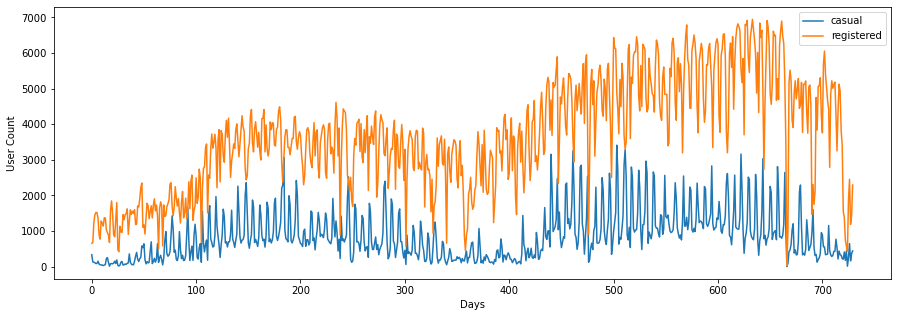

In [13]:
# Plotting line graph of cnt values to better visualize the trend

plt.figure(figsize=(15,5))
df.casual.plot()
df.registered.plot()
plt.xlabel("Days")
plt.ylabel("User Count")
plt.legend()
plt.show()

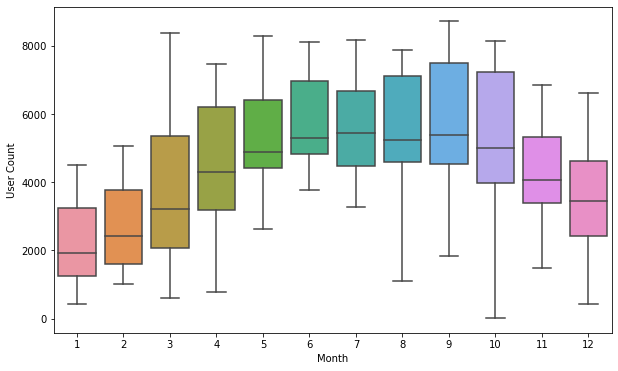

In [14]:
# Boxplot of spread of number of riders over the months

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="mnth",y="cnt")
plt.xlabel("Month")
plt.ylabel("User Count")
plt.show()

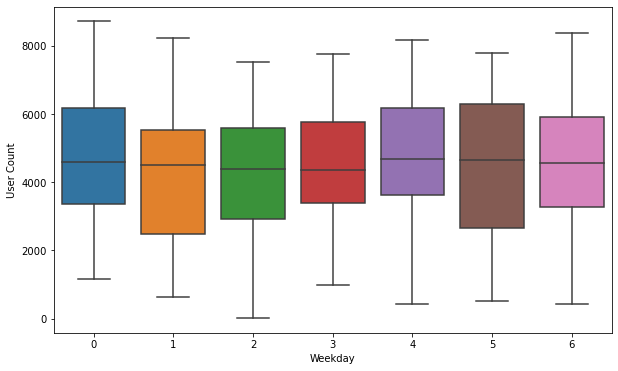

In [15]:
# Boxplot of trend of riders on weekdays

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="weekday",y="cnt")
plt.xlabel("Weekday")
plt.ylabel("User Count")
plt.show()

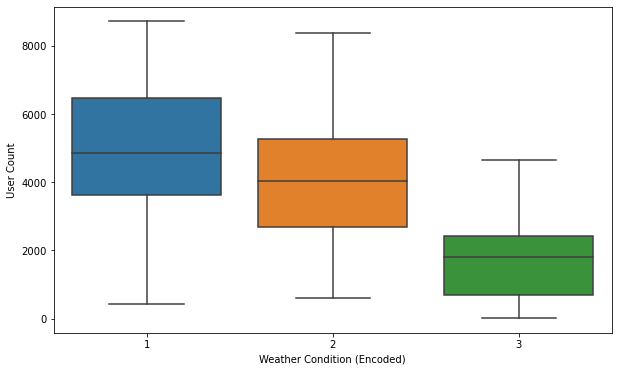

In [16]:
# Graphical represention of effect of weather conditions on subscribers

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="weathersit",y="cnt")
plt.xlabel("Weather Condition (Encoded)")
plt.ylabel("User Count")
plt.show()

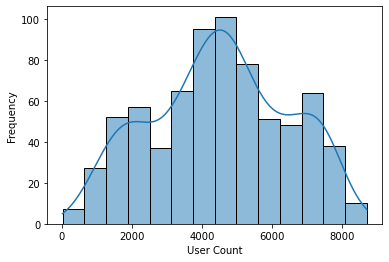

In [17]:
# Checking the distribution of cnt variable

sns.histplot(df.cnt,kde=True)
plt.xlabel("User Count")
plt.ylabel("Frequency")
plt.show()

<Figure size 864x432 with 0 Axes>

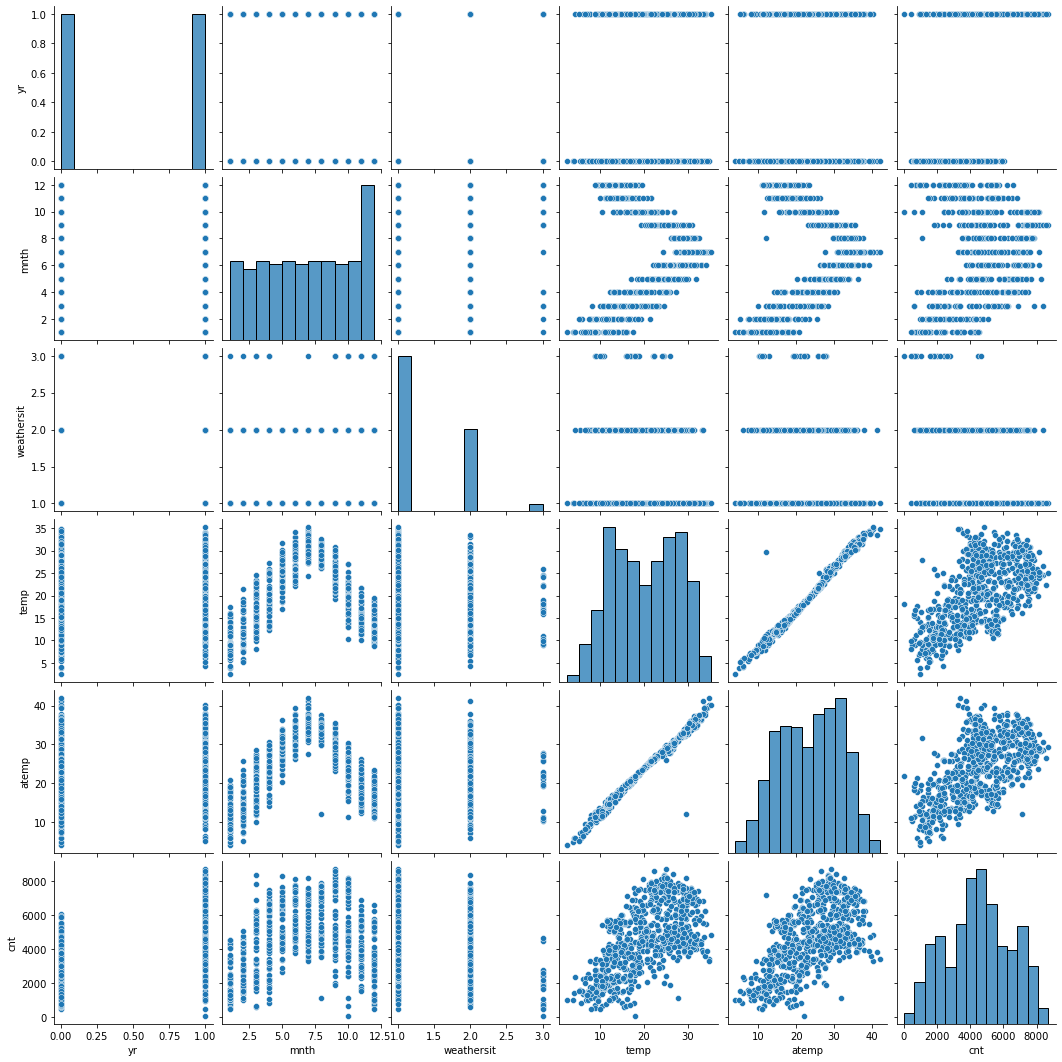

In [18]:
# Visual representation of correlation of variables

plt.figure(figsize=(12,6))
cols=["yr","mnth","weathersit","temp","atemp","cnt"]
sns.pairplot(df[cols])
plt.show()

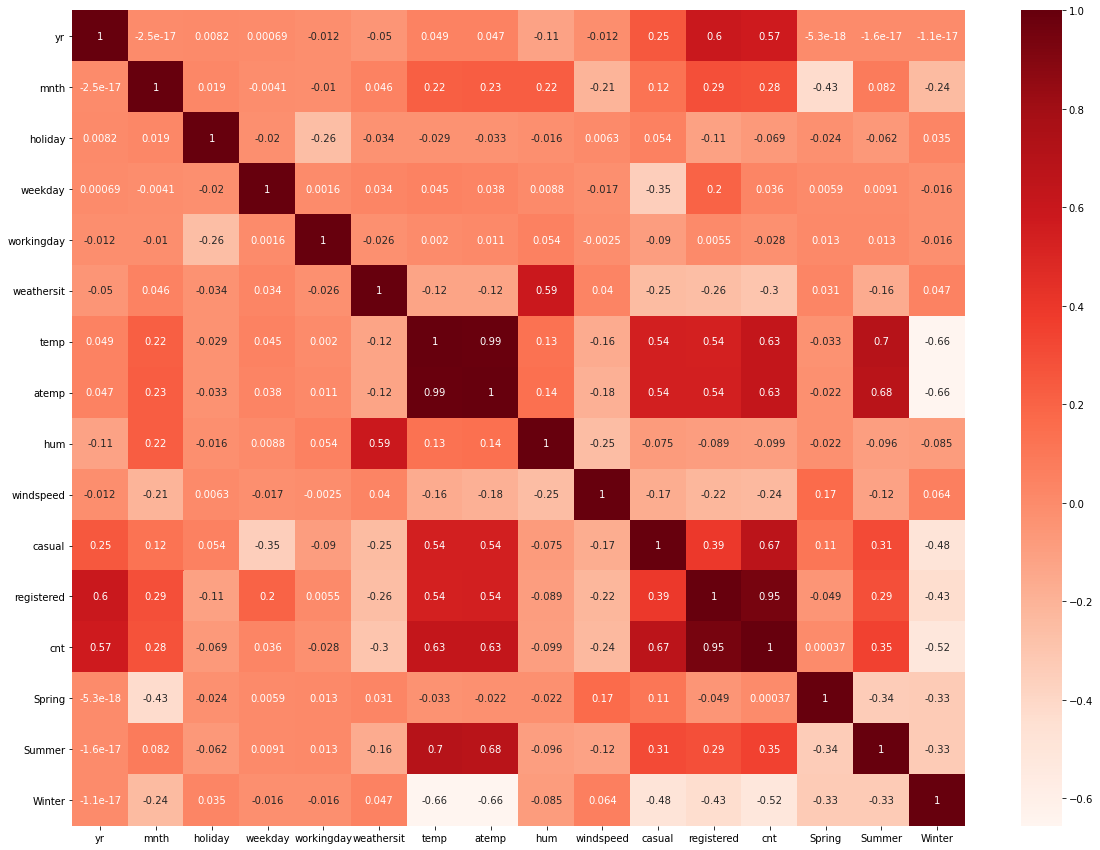

In [19]:
# Graphical presentation of correlation of variables

plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),cmap="Reds",annot=True)
plt.show()

### Model Building

In [20]:
# Importing necessary libraries for model generation

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [21]:
# Intializing linear regression function

lm=LinearRegression()

In [22]:
# Creating training and testing datasets

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
# Intializing scaling function

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all numeric variables

num_vars = ["temp","atemp","windspeed","hum"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
# Dropping date column for linear regression
X_train=df_train.drop("dteday",axis=1)

# Assigning independent and target variables
y_train=X_train.pop("cnt")
X_train=X_train

#### Model 1 - Primary model building

In [26]:
# Creating our first model

X_train_lm=X_train
X_train_lm=sm.add_constant(X_train_lm)
lm1=sm.OLS(y_train,X_train_lm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.855e+30
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:56:09   Log-Likelihood:                 12693.
No. Observations:                 510   AIC:                        -2.535e+04
Df Residuals:                     494   BIC:                        -2.529e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.705e-12   1.54e-12     -1.109      0.268   -4.73e-12    1.32e-12
yr         -1.563e-13   5.46e-13     -0.286      0.775   -1.23e-12    9.16e-13
mnth       -4.619e-14   6.98e-14     -0.661      0.509   -1.83e-13     9.1e-14
holiday    -6.821e-13   1.15e-12     -0.592      0.554   -2.95e-12    1.58e-12
weekday     1.563e-13   1.04e-13      1.509      0.132   -4.72e-14     3.6e-13
workingday  5.649e-13   3.93e-13      1.437      0.151   -2.08e-13    1.34e-12
weathersit -6.821e-13   4.24e-13     -1.608      0.109   -1.52e-12    1.52e-13
temp       -1.364e-12   5.79e-12     -0.236      0.814   -1.27e-11       1e-11
atemp      -4.547e-12   5.85e-12     -0.778      0.437    -1.6e-11    6.94e-12
hum         1.592e-12   1.64e-12      0.968      0.333   -1.64e-12    4.82e-12
windspeed  -6.821e-13   1.17e-12     -0.583      0.560   -2.98e-12    1.62e-12
casual         1.0000   3.84e-16    2.6e+15      0.000       1.000       1.000
registered     1.0000   2.28e-16   4.39e+15      0.000       1.000       1.000
Spring      -1.08e-12   6.26e-13     -1.724      0.085   -2.31e-12    1.51e-13
Summer     -1.251e-12   7.12e-13     -1.757      0.079   -2.65e-12    1.48e-13
Winter     -9.095e-13   6.77e-13     -1.344      0.180   -2.24e-12     4.2e-13
==============================================================================
Omnibus:                       10.849   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.221
Skew:                           0.363   Prob(JB):                      0.00366
Kurtosis:                       2.960   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Inference:__    
High Adjusted R-squared score could indicates that the model is overfitting.  
Our target variable "cnt" is dependent on registered variable which is indicated by the high correlation coefficient and hence needs to be dropped.  
Same follows for casual variable as well.  

#### Model 2 - Removing registered and casual variable

In [27]:
# Dropping registered and casual variable

X_train_lm=X_train_lm.drop("registered",axis=1)
X_train_lm=X_train_lm.drop("casual",axis=1)
lm2=sm.OLS(y_train,X_train_lm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.02e-172
Time:                        20:56:09   Log-Likelihood:                -4155.8
No. Observations:                 510   AIC:                             8340.
Df Residuals:                     496   BIC:                             8399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3246.6324    306.576     10.590      0.000    2644.284    3848.981
yr          2032.7289     76.323     26.633      0.000    1882.772    2182.686
mnth          82.4718     14.932      5.523      0.000      53.134     111.809
holiday    -1026.4596    250.492     -4.098      0.000   -1518.616    -534.303
weekday       11.7351     19.136      0.613      0.540     -25.863      49.333
workingday  -165.4453     86.691     -1.908      0.057    -335.773       4.882
weathersit  -674.7135     89.195     -7.564      0.000    -849.961    -499.466
temp        3801.8013   1271.041      2.991      0.003    1304.514    6299.089
atemp        745.8041   1295.783      0.576      0.565   -1800.096    3291.705
hum        -1196.3487    361.093     -3.313      0.001   -1905.808    -486.889
windspeed  -1822.3026    246.249     -7.400      0.000   -2306.123   -1338.482
Spring        -9.2242    139.009     -0.066      0.947    -282.343     263.895
Summer      -690.9922    154.924     -4.460      0.000    -995.380    -386.604
Winter      -697.6158    146.317     -4.768      0.000    -985.094    -410.138
==============================================================================
Omnibus:                       67.702   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.300
Skew:                          -0.773   Prob(JB):                     8.37e-29
Kurtosis:                       4.922   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Inference:__    
Dropping "registered" variable helps bring down the probable F-statistic score.   
p-value of Spring variable is unacceptable and we must drop it next.

#### Model 3 - Removing Spring variable

In [28]:
# Dropping Spring variable

X_train_lm=X_train_lm.drop("Spring",axis=1)
lm3=sm.OLS(y_train,X_train_lm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.36e-174
Time:                        20:56:09   Log-Likelihood:                -4155.8
No. Observations:                 510   AIC:                             8338.
Df Residuals:                     497   BIC:                             8393.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3238.2449    279.027     11.606      0.000    2690.028    3786.462
yr          2032.7667     76.245     26.661      0.000    1882.965    2182.568
mnth          83.0957     11.588      7.171      0.000      60.328     105.863
holiday    -1024.6706    248.787     -4.119      0.000   -1513.475    -535.866
weekday       11.7349     19.117      0.614      0.540     -25.826      49.295
workingday  -165.2631     86.561     -1.909      0.057    -335.333       4.807
weathersit  -674.5752     89.082     -7.573      0.000    -849.598    -499.552
temp        3804.1085   1269.292      2.997      0.003    1310.269    6297.948
atemp        741.5917   1292.930      0.574      0.567   -1798.691    3281.875
hum        -1195.9033    360.668     -3.316      0.001   -1904.526    -487.280
windspeed  -1823.5155    245.324     -7.433      0.000   -2305.515   -1341.516
Summer      -685.9629    134.983     -5.082      0.000    -951.170    -420.755
Winter      -692.2380    121.700     -5.688      0.000    -931.348    -453.128
==============================================================================
Omnibus:                       67.670   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.145
Skew:                          -0.773   Prob(JB):                     9.05e-29
Kurtosis:                       4.920   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Inference:__   
The p-value of Spring variable was unacceptable, and dropping it hasn't affected our adjusted R-squared score negatively.  
p-value of atemp is quite high and needs to be dropped.

#### Model 4 - Removing atemp variable

In [29]:
# Dropping atemp variable

X_train_lm=X_train_lm.drop("atemp",axis=1)
lm4=sm.OLS(y_train,X_train_lm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          5.98e-175
Time:                        20:56:09   Log-Likelihood:                -4155.9
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     498   BIC:                             8387.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3251.9921    277.808     11.706      0.000    2706.172    3797.812
yr          2032.1318     76.185     26.674      0.000    1882.448    2181.816
mnth          83.1926     11.579      7.185      0.000      60.443     105.943
holiday    -1029.4835    248.478     -4.143      0.000   -1517.678    -541.289
weekday       11.0037     19.062      0.577      0.564     -26.448      48.455
workingday  -161.8748     86.301     -1.876      0.061    -331.433       7.684
weathersit  -677.2373     88.901     -7.618      0.000    -851.904    -502.571
temp        4507.8929    324.644     13.886      0.000    3870.052    5145.734
hum        -1188.6760    360.205     -3.300      0.001   -1896.386    -480.966
windspeed  -1851.4000    240.297     -7.705      0.000   -2323.520   -1379.280
Summer      -700.9591    132.337     -5.297      0.000    -960.968    -440.951
Winter      -693.0677    121.609     -5.699      0.000    -931.998    -454.137
==============================================================================
Omnibus:                       66.124   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.288
Skew:                          -0.760   Prob(JB):                     6.23e-28
Kurtosis:                       4.893   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Inference:__   
Dropping atemp has no negative effect on R-squared score, justifying our interpretation.  
Next, we need to drop weekday due to its high p-value

#### Model 5 - Removing weekday variable

In [30]:
# Dropping weekday variable 

X_train_lm=X_train_lm.drop("weekday",axis=1)
lm5=sm.OLS(y_train,X_train_lm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.63e-176
Time:                        20:56:09   Log-Likelihood:                -4156.1
No. Observations:                 510   AIC:                             8334.
Df Residuals:                     499   BIC:                             8381.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3284.1246    271.992     12.074      0.000    2749.733    3818.516
yr          2031.1851     76.117     26.685      0.000    1881.636    2180.734
mnth          82.9861     11.566      7.175      0.000      60.262     105.710
holiday    -1029.0768    248.311     -4.144      0.000   -1516.941    -541.213
workingday  -161.1358     86.234     -1.869      0.062    -330.562       8.290
weathersit  -676.2470     88.825     -7.613      0.000    -850.764    -501.730
temp        4515.9366    324.128     13.933      0.000    3879.112    5152.761
hum        -1190.2209    359.955     -3.307      0.001   -1897.434    -483.007
windspeed  -1857.2858    239.920     -7.741      0.000   -2328.663   -1385.908
Summer      -705.0342    132.061     -5.339      0.000    -964.498    -445.571
Winter      -693.7966    121.521     -5.709      0.000    -932.553    -455.040
==============================================================================
Omnibus:                       67.984   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.610
Skew:                          -0.777   Prob(JB):                     7.17e-29
Kurtosis:                       4.920   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Inference:__   
p-value of workingday is on the higher side and needs to be dropped.

#### Model 6 - Removing workingday variable

In [31]:
# Dropping workingday variable 

X_train_lm=X_train_lm.drop("workingday",axis=1)
lm6=sm.OLS(y_train,X_train_lm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.63e-176
Time:                        20:56:10   Log-Likelihood:                -4157.9
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     500   BIC:                             8378.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3157.9079    264.127     11.956      0.000    2638.971    3676.844
yr          2030.6632     76.306     26.612      0.000    1880.744    2180.582
mnth          82.9035     11.595      7.150      0.000      60.123     105.684
holiday     -908.8212    240.423     -3.780      0.000   -1381.186    -436.457
weathersit  -657.8332     88.496     -7.433      0.000    -831.703    -483.963
temp        4554.6268    324.271     14.046      0.000    3917.525    5191.729
hum        -1245.7218    359.620     -3.464      0.001   -1952.274    -539.170
windspeed  -1866.3720    240.467     -7.761      0.000   -2338.823   -1393.921
Summer      -709.9598    132.363     -5.364      0.000    -970.016    -449.904
Winter      -681.7061    121.651     -5.604      0.000    -920.716    -442.696
==============================================================================
Omnibus:                       62.831   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.415
Skew:                          -0.717   Prob(JB):                     2.62e-27
Kurtosis:                       4.925   Cond. No.                         84.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Inference:__   
The adjusted R-squared score is now in the acceptable range after dropping all the irrelevant variables.  
Since the p-value of all the variables is now within acceptable range, we can finalize this model.

### Residual Analysis

In [32]:
# Making prediction about training test using our final model

y_train_pred=lm6.predict(X_train_lm)

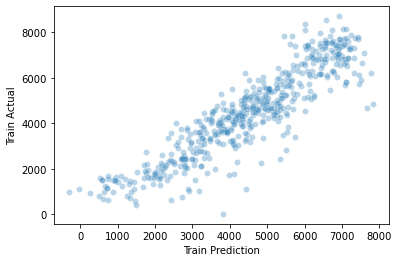

In [33]:
# Visualizing the relationship between the predictions made and the actual target

sns.scatterplot(x=y_train_pred,y=y_train, alpha=0.3)
plt.xlabel("Train Prediction")
plt.ylabel("Train Actual")
plt.show()

**Observation:** _There is no pattern visible indicating any bias and the linear trend suggests model reliability_

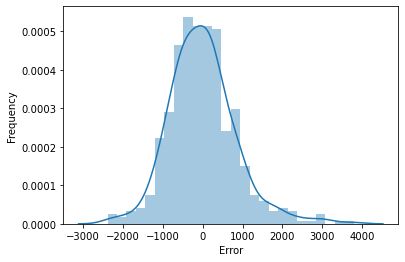

In [34]:
# Residual Analysis

sns.distplot(y_train_pred-y_train)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

**Observation:** _Error is centered around zero and the distriution follows bell shape curve as desired._

### Predictions

In [35]:
# Scaling the numeric variables in test dataset

num_vars = ["temp","atemp","windspeed","hum"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [36]:
# Assigning independent and target variables accordingly

y_test=df_test.pop("cnt")
X_test=df_test

In [37]:
# Adding constant variable to the test dataset as well
X_test=sm.add_constant(X_test)

# Using the same columns present in the final training dataset for testing
X_test=X_test[X_train_lm.columns]

# Making prediction using our final model and storing it in y_pred
y_pred=lm6.predict(X_test)

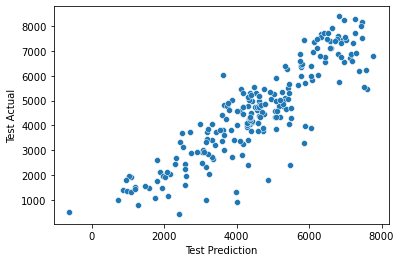

In [38]:
# Visualizing the relationship between the predictions made and the actual target
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel("Test Prediction")
plt.ylabel("Test Actual")
plt.show()

**Observation:** _The linear trend for test set is similar to the training set. This helps prove model's accuracy._

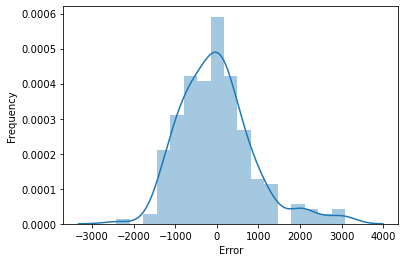

In [39]:
# Residual Analysis
sns.distplot(y_pred-y_test)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

**Observation:** _The error is again centered around zero while the distribution follows a bell shape curve._

### Model Evaluation

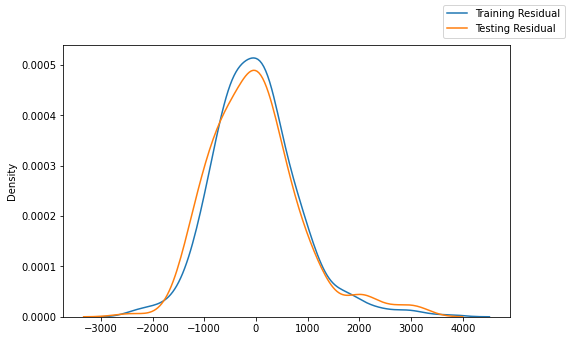

In [40]:
plt.figure(figsize=(8,5))
sns.kdeplot(y_train_pred-y_train)
sns.kdeplot(y_pred-y_test,legend=True)
plt.figlegend(("Training Residual","Testing Residual"))
plt.show()

**Observation:** _This plot shows overlap of error distribution curve of the training and the test dataset. The overlap suggests that our model is able to predict the target variable equally well for the test set as it did for the training set._

In [41]:
# Calculating the r-squared score for evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.782038849772472

### **Conclusion:**  

_Based on our model, we can predict the number of users on any given day using the following equation:_

**users = 3157.90 + (yr * 2030.66) + (mnth * 82.90) + (holiday * -908.82) + (weathersit * -657.83) + (temp * 4554.63) + (hum * -1245.72) + (windspeed * -1866.37) + (Summer * -709.96) + (Winter * -681.71)**

The value of variables used have been scaled and needs to scaled for the new data as well.

By observing the equation, we can make the following interpretations:
- Since the constant is 3157.90, we can expect atleast these many users on any given day.
- Variables like month, temperature have a positive impact on the number of subscribers, whereas holiday, weather condition, humisity, windspeed and seasons like Summer and Winter have a negative impact.
- We can make the above prediction with 78% accuracy using the training data provided.